# Phase 3 Code Challenge Review

Agenda:
- Gradient Descent & Cost Function
- Logistic Regression
- Evaluation Metrics
- Decision Trees

## Part I. Gradient Descent & Cost Function
- What is a cost function? What are we trying to find?  
-- A cost function is a measure of how far off a model is in estimating the relationship between the independent variable and the dependent variable. It is essentially the sum of the squared errors between the predicted values of Y and the actual values of Y.  
--We are trying to find the lowest point along the cost function (local maximum), i.e. the point that minimizes total error.
- How to use gd to find the lowest point? How does the gradient change as we get closer to the bottom?  
-- Gradient descent can be used by stepping along the curve by picking a starting point and finding the derivative at that point, stepping in the direction of the gradient, then repeating. The gradient becomes becomes smaller in absolute value as we get closer to the bottom.
- What role does learning rate play? How can learning rate affect your result?  
-- Learning rate dictates how big each iterative step is. Too big of a learning rate can cause our function to continuously overshoot the minimize and fail to converge, too small and it can take too many steps to converge and be costly from a computational perspective.


<p style='text-align:center;font-size:20px'>$ \theta_j := \theta_j - \alpha * \frac{\partial J(\theta)}{\partial\theta_i} $</p>

What is the difference between a machine learning model and a machine learning algorithm?

A machine learning model is a modeling methodology that seeks to determine a relationship between indepedent variables (features) and a dependent variable (target variable).  
A machine learning algorithm is a series of steps that can be followed to calculate certain coefficients, weights, and other parameters in attempting to build a machine learning model.

<Figure size 576x576 with 0 Axes>

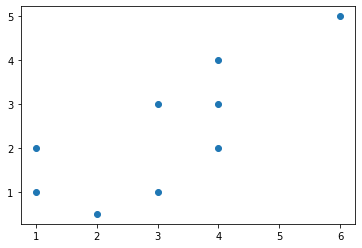

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
plt.figure(figsize = (8,8))
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

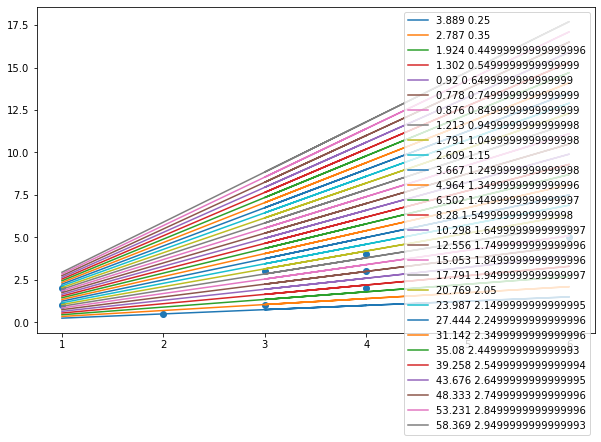

In [2]:
beta_0 = 0
#beta_1 = [.25, .5, .75, .8, 1,]
beta_1 = np.arange(0.25,3,0.1)
fig, ax = plt.subplots(figsize=(10,6))
mses = []
for t in beta_1:
    line = beta_0 + (np.array(x)*t)
    mse = round(mean_squared_error(y, line),3)
    mses.append(mse)
    ax.plot(x, line, label=f'{mse} {t}')
ax.scatter(x,y)
plt.legend()
plt.show()

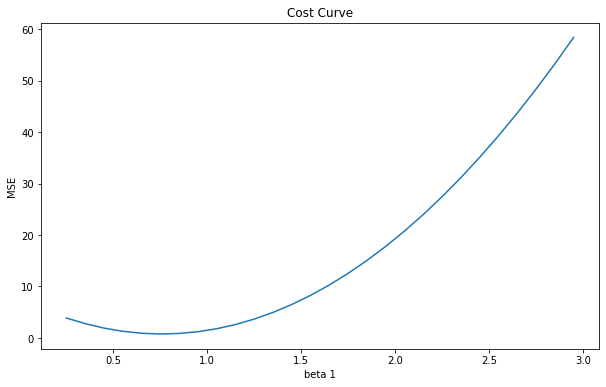

In [3]:
# Plot the Cost Curve
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(beta_1, mses)
ax.set_title('Cost Curve')
ax.set_xlabel('beta 1')
ax.set_ylabel('MSE')
plt.show()

#### For gradient descent, the questions are going to be mostly intuitive and written answers. You will need to be able to answer questions such as the 3 bullet points above.

## Part II. Logistic Regression 
- How does linear regression differ from logistic regression?  
-- Linear regression attempts to find a linear relationship between our features and our target variable, useful for continuous variables. Logistic regression attempst to find a logit relationship between our features and our target variable, useful for binary variables.
- Why is logistic regression better at modeling a binary outcome?  
-- Logistic regression is better at modeling binary outcomes because the logit function easily bifurcates the output to two values (1,0).
- What are some advantages and disadvantages of logistic regression?  
-- Advantages: Useful for categorical data; can be independent of feature magnitude; easy to implement and train; quick vs other models like KNN; parametric model - coefficients are more interpretable; uses less memory to store, just parameters vs the entire set of data for KNN, for example
-- Disadvantages: Will not work for continuous data; does not work for non-linear data; may need to engineer polynomial features, interaction features, whereas decision tree for examples does not need these

## Part III. Evaluation Metrics 
- What are precision and recall?  
-- Precision is the measure of how well a model can correctly distinguish positive values from false positives: TP/ (TP + FP)  
-- Recall is the measure of how well a model can correctly distinguish positive values from negative values: TP/ (TP + TN)  
- How to evaluate a logistic regression model?  
Precision
- What is roc auc curve?  
-- ROC (receiver operating characteristic curve) plots true positive rates vs false positive rates under all thresholds from 0 to 1.  
-- AUC (are under the curve) measures the aggregate performance across all classification thresholds.
- What is class imbalance and how do we deal with it?

<img src = 'confusion_matrix.png' width = 300>

In [4]:
tp = 63
fp = 15
tn = 123
fn = 22

In [7]:
### calculate precision here
precision = tp/(tp+fp)
precision

0.8076923076923077

In [9]:
### calculate recall here
recall = tp/(tp+fn)
recall

0.7411764705882353

In [10]:
### calculate F1 score here
f1_score = 2*precision*recall / (precision + recall)
print(f1_score)

0.7730061349693251


**Explain which model below has the best performance based on ROC-AUC curve? Why?**

<img src='roc_auc.png' width = 400>

### Class Imbalance
<img src = 'imbalanced.png' wid = 300>

### what problem would it cause? 
Could bias toward the dominant class... accuracy may be high, but precision and recall may be way off.

### How to remedy it?
class-sensitivity training, change the method, do a Grid Search and optimize precision, recall, etc.

### Solution 1 - Resampling
<img src = 'resampling.png'>

#### Solution 2 - Smote
<img src = 'smote.png'>

#### Solution 3 - Tomek Link 
<img src = 'tomek.png'>

## Part III. Decision Trees
- Build trees with the sklearn machine learning framework

In [11]:
# import the dataset and set up predictors and target
titanic = sns.load_dataset('titanic')

In [12]:
# define x and y 
y = titanic['survived']
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
     'adult_male']]

In [ ]:
# fill the age columns missing value with mean 


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split


In [ ]:
# fit the tree
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# test the tree 


In [ ]:
# generate prediction and output metric (use accuracy)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

In [ ]:
# how did our tree do? did it perform well?

## hint: think about baseline model
